In [ ]:
# Loading GermanCredit.csv into a Pandas datafram df before starting tasks for Problem 2 preprocessing and analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df = pd.read_csv("GermanCredit.csv") 
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
## Function to drop the (3) columns with the highest amount of "None" values. Breaks ties by going left to right in the dataframe's columns. These columns contribute the LEAST to the dataset, so they're removed.
def drop_least(df, n):
    none_counts = (df == "none").sum()
    least_cols = none_counts.sort_values(ascending=False).head(n).index
    return df.drop(columns=least_cols), least_cols

df, dropped_cols = drop_least(df, 3)
print("Dropped:", list(dropped_cols))
df.head()

Dropped: ['other_parties', 'other_payment_plans', 'own_telephone']


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad


In [ ]:
##Removes unnecessary apostrophes from values in columns.
def remove_apostrophes(df):
    obj_cols = df.select_dtypes(include="object").columns
    for col in obj_cols:
        df[col] = df[col].str.replace("'", "", regex=False)
    return df

In [ ]:
## Sets the df to the one returned without apostrophes
df = remove_apostrophes(df)

In [ ]:
## The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. This cell changes these categories to 'No Checking', 'Low', 'Medium', and 'High'
checking_map = {
    "no checking": "No Checking",
    "<0": "Low",
    "0<=X<200": "Medium",
    ">=200": "High"
}

df["checking_status"] = df["checking_status"].map(checking_map)

In [ ]:
## The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. This code replaces these categories with 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively.
savings_map = {
    "no known savings": "No Savings",
    "<100": "Low",
    "100<=X<500": "Medium",
    "500<=X<1000": "High",
    ">=1000": "High"
}

df["savings_status"] = df["savings_status"].map(savings_map)

In [ ]:
## Changes class column values from 'good' to '1' and 'bad' to '0'
class_map = {"good": 1, "bad": 0}
df["class"] = df["class"].map(class_map)

In [ ]:
## Changes the Employment column value 'unemployed' to 'Unemployed'. For the others, it changes to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range. 
## The year ranges used here: Less than 1 year changes to 'Amateur'. [1,4) years changes to 'Professional'. [4,7) changes to 'Experienced'. 7+ years changes to 'Expert'
employment_map = {
    "unemployed": "Unemployed",
    "<1": "Amateur",
    "1<=X<4": "Professional",
    "4<=X<7": "Experienced",
    ">=7": "Expert"
}

df["employment"] = df["employment"].map(employment_map)

In [ ]:
# Analysis:
## Gets the count of each category of foreign workers (yes and no) for each class of credit (good and bad).
pd.crosstab(df["foreign_worker"], df["class"])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [ ]:
## gets the count of each category of employment for each category of saving_status.
pd.crosstab(df["employment"], df["savings_status"])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [ ]:
## Finds the average credit_amount of single males that have 4<=X<7 years of employment. Leaves the raw result as is, without rounding.
mask = (df["personal_status"] == "male single") & (df["employment"] == "Experienced")
df.loc[mask, "credit_amount"].mean()

4142.592592592592

In [ ]:
## Finds the avg credit duration for each of the job types. Leaves raw result as is, wihtout rounding
df.groupby("job")["duration"].mean()

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

In [ ]:
## finds the most common checking_status and savings_status for the purpose 'education' by printing
## Most common checking status: ...
## Most common savings status: ...
edu_df = df[df["purpose"] == "education"]
most_checking = edu_df["checking_status"].value_counts().idxmax()
most_savings  = edu_df["savings_status"].value_counts().idxmax()
print("Most common checking status:", most_checking)
print("Most common savings status:", most_savings)

Most common checking status: No Checking
Most common savings status: Low


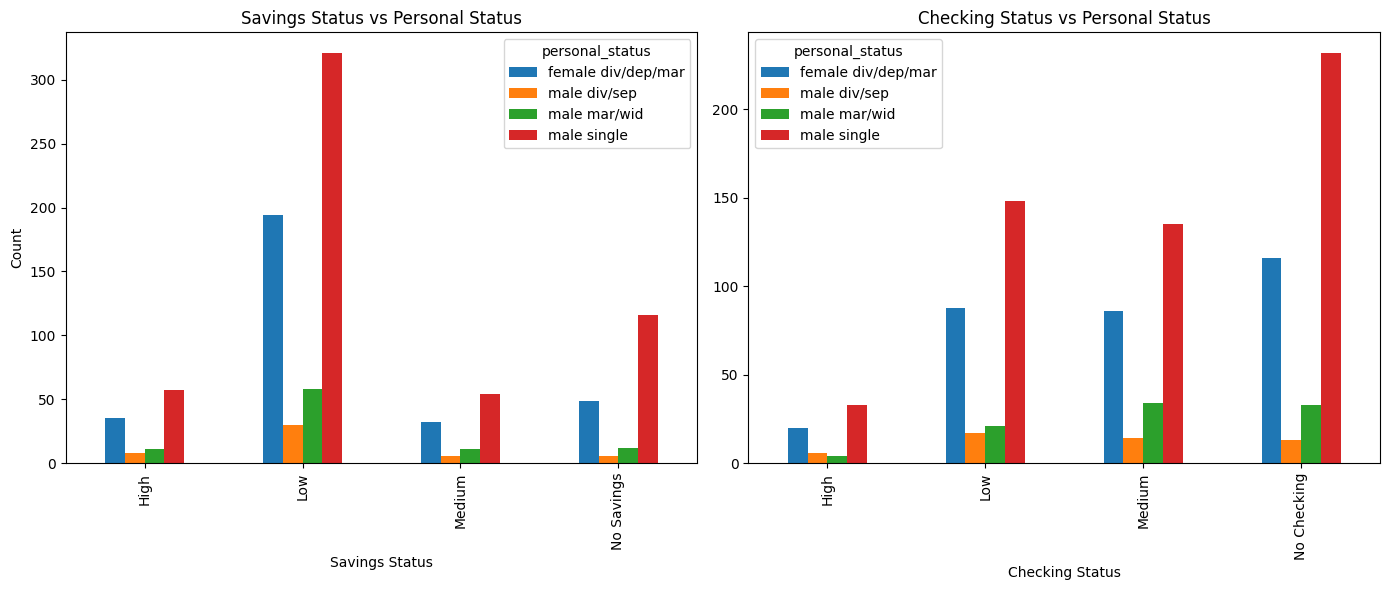

In [ ]:
## Visualization
## Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color.

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pd.crosstab(df["savings_status"], df["personal_status"]).plot(
    kind="bar", ax=axes[0]
)
axes[0].set_title("Savings Status vs Personal Status")
axes[0].set_xlabel("Savings Status")
axes[0].set_ylabel("Count")

pd.crosstab(df["checking_status"], df["personal_status"]).plot(
    kind="bar", ax=axes[1]
)
axes[1].set_title("Checking Status vs Personal Status")
axes[1].set_xlabel("Checking Status")

plt.tight_layout()
plt.show()


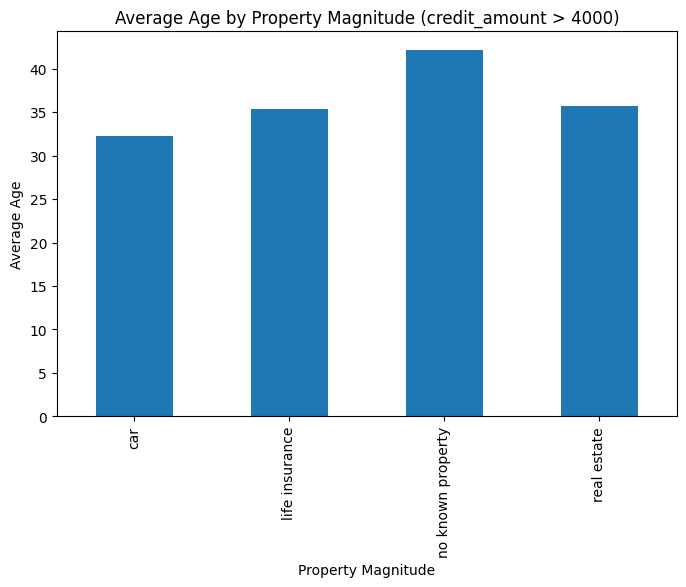

In [ ]:
## For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

subset = df[df["credit_amount"] > 4000]
avg_age = subset.groupby("property_magnitude")["age"].mean()

avg_age.plot(kind="bar", figsize=(8, 5))
plt.xlabel("Property Magnitude")
plt.ylabel("Average Age")
plt.title("Average Age by Property Magnitude (credit_amount > 4000)")
plt.show()


In [ ]:
## For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
## Personal status
## Credit history
## Job

subset = df[(df["savings_status"] == "High") & (df["age"] > 40)]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

subset["personal_status"].value_counts().plot(
    kind="pie", ax=axes[0], autopct="%1.1f%%", title="Personal Status"
)
subset["credit_history"].value_counts().plot(
    kind="pie", ax=axes[1], autopct="%1.1f%%", title="Credit History"
)
subset["job"].value_counts().plot(
    kind="pie", ax=axes[2], autopct="%1.1f%%", title="Job"
)
plt.show()
